# supervisado 

## regresion lineal
* Una variable
* Utilizar la misma variable con diferentes trasnformaciones para crear un modelo mas flexible
* Crear dummy variables
* Utilizar muchas variables
* Utilizar datos de entrenamiento y test


In [ ]:
! pip install numpy==1.23 pandas==0.25.3 plotly scipy statsmodels==0.13.2

In [1]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

In [3]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [21]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C320 4dr,Sedan,Asia,Front,"$21,055",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


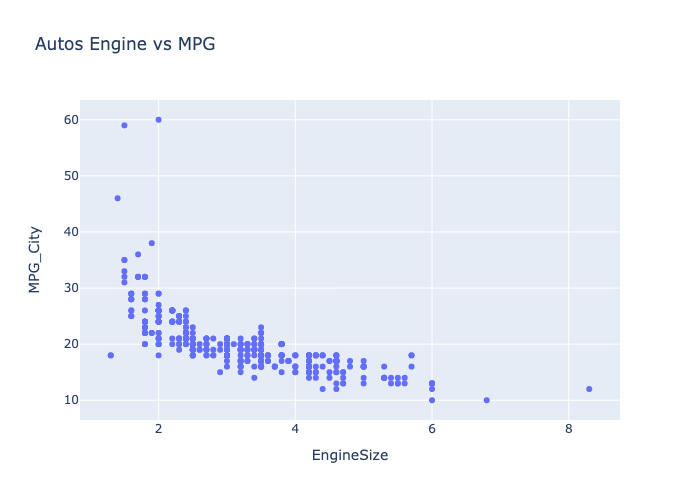

In [22]:
fig = px.scatter(df[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG"
                )
display_static(fig)

In [162]:
# ejemplo clase
df[['MPG_City','EngineSize']].sample(12)

,MPG_City,EngineSize
391,20,3.3
41,16,3.2
123,27,2.0
30,19,2.5
335,20,2.7
427,20,2.5
399,14,3.4
325,17,4.6
194,18,4.2
119,15,4.6


In [23]:
#define response variable
y = df['MPG_City']

#define predictor variables
x = df[['EngineSize']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_City   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     431.7
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           9.86e-67
Time:                        23:48:37   Log-Likelihood:                -1165.8
No. Observations:                 428   AIC:                             2336.
Df Residuals:                     426   BIC:                             2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7772      0.546     56.388      0.000      29.704      31.850
EngineSize    -3.3523      0.161    -20.778      0.000      -3.669      -3.035
==============================================================================
Omnibus:                      447.615   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25957.663
Skew:                           4.519   Prob(JB):                         0.00
Kurtosis:                      40.066   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x = list(range(0,9))
y_hat = [ -3.3523*x_i + 30.7772 for x_i in x]

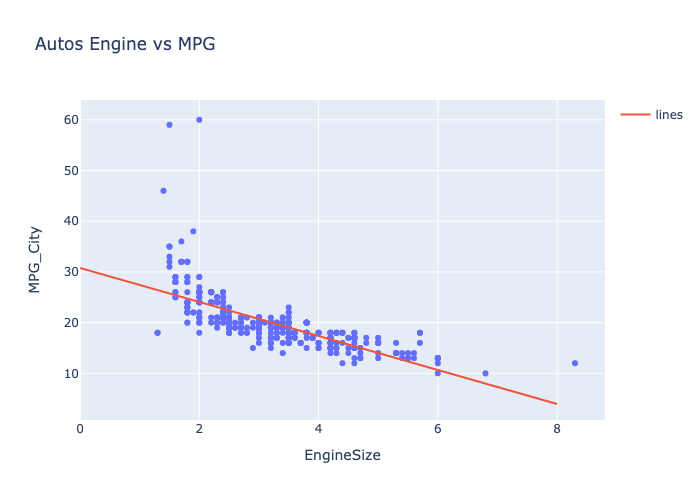

In [25]:
fig = px.scatter(df[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG")
fig.add_trace(go.Scatter(x=x, y=y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

In [26]:
df_2 = df
df_2["EngineSize_pwr2"] = df['EngineSize']*df['EngineSize']
#define response variable
y = df_2['MPG_City']

#define predictor variables
x = df_2[['EngineSize','EngineSize_pwr2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_City   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.54e-77
Time:                        23:48:37   Log-Likelihood:                -1138.0
No. Observations:                 428   AIC:                             2282.
Df Residuals:                     425   BIC:                             2294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.2613      1.217     32.259      0.000      36.869      41.653
EngineSize         -8.6497      0.706    -12.255      0.000     -10.037      -7.262
EngineSize_pwr2     0.7383      0.096      7.684      0.000       0.549       0.927
==============================================================================
Omnibus:                      444.521   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30226.384
Skew:                           4.390   Prob(JB):                         0.00
Kurtosis:                      43.222   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
x = list(range(0,9))
x_pwr2 = np.array(x) * np.array(x)

In [28]:
y_hat = -8.6497 * np.array(x) + 0.7383 * x_pwr2 + 39.2613
y_hat

array([39.2613, 31.3499, 24.9151, 19.9569, 16.4753, 14.4703, 13.9419,
       14.8901, 17.3149])

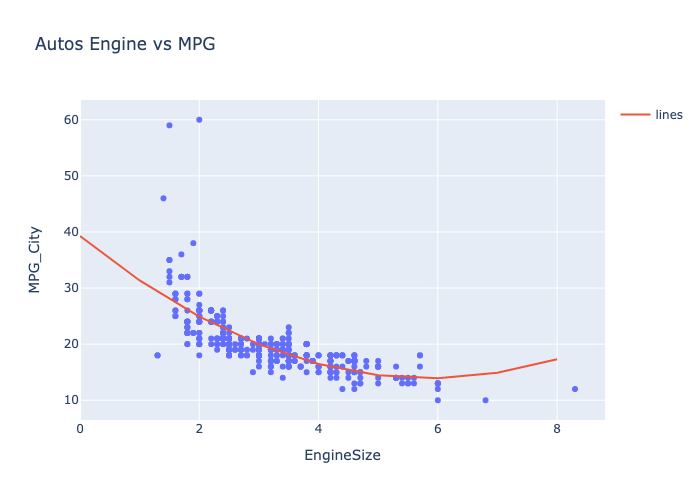

In [29]:
fig = px.scatter(df_2[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG")
fig.add_trace(go.Scatter(x=x, y=y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

In [30]:
df_3 = df_2
df_3["EngineSize_pwr3"] = df['EngineSize']*df['EngineSize']*df['EngineSize']
#define response variable
y = df_3['MPG_City']

#define predictor variables
x = df_3[['EngineSize','EngineSize_pwr2','EngineSize_pwr3']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()
x
#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_City   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     200.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           7.54e-81
Time:                        23:48:37   Log-Likelihood:                -1126.8
No. Observations:                 428   AIC:                             2262.
Df Residuals:                     424   BIC:                             2278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              50.1746      2.578     19.460      0.000      45.107      55.243
EngineSize        -18.3883      2.155     -8.531      0.000     -22.625     -14.152
EngineSize_pwr2     3.3354      0.553      6.035      0.000       2.249       4.422
EngineSize_pwr3    -0.2094      0.044     -4.768      0.000      -0.296      -0.123
==============================================================================
Omnibus:                      435.139   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31812.491
Skew:                           4.196   Prob(JB):                         0.00
Kurtosis:                      44.394   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x = list(range(0,11))
x_pwr2 = np.array(x) * np.array(x)
x_pwr3 = np.array(x) * np.array(x) * np.array(x)

In [32]:
y_hat = -18.3883 * np.array(x) + 3.3354 * x_pwr2 -0.2094*x_pwr3+ 50.1746
y_hat

array([50.1746, 34.9123, 25.0644, 19.3745, 16.5862, 15.4431, 14.6888,
       13.0669,  9.321 ,  2.1947, -9.5684])

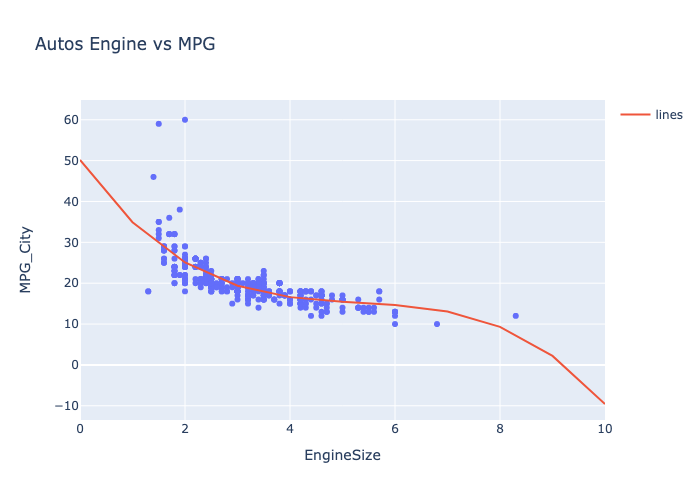

In [33]:
fig = px.scatter(df_2[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG")
fig.add_trace(go.Scatter(x=x, y=y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

In [34]:
# Calcular el mismo modelo a mano
df_3["const"] = 1
col_names = ["const",'EngineSize','EngineSize_pwr2','EngineSize_pwr3']
X = df_3[col_names]
y = df['MPG_City']
w = np.linalg.inv(X.T @ X)@(X.T@y)
for n,v in zip(col_names,w):
    print(f"{n}:{v}")
y_hat = X @ w
print(f"training mse error : {np.mean(np.power(y-y_hat,2))}")

const:50.174588047306315
EngineSize:-18.38827826767556
EngineSize_pwr2:3.3353708038930563
EngineSize_pwr3:-0.2094433106810243
training mse error : 11.329773684672682


## Codigo utilizando muchas variables
El siguiente codigo utiliza variables categoricas, y crea un modelo q puede explicar la variacion de la variable y en 0.82

In [4]:
df.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200,24,31,2778,101,172


In [5]:
df['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Volkswagen       15
Chrysler         15
Mitsubishi       13
Dodge            13
Jaguar           12
Volvo            12
Hyundai          12
Pontiac          11
Subaru           11
Lexus            11
Kia              11
Mazda            11
Buick             9
Lincoln           9
Mercury           9
GMC               8
Saturn            8
Infiniti          8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Jeep              3
Oldsmobile        3
Land Rover        3
MINI              2
Isuzu             2
Scion             2
Hummer            1
Name: Make, dtype: int64

In [6]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [19]:
df_x = pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)
df_x = pd.concat((df_x, df), axis=1)

In [20]:
df_x.head(5)

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Type_nan,Origin_Europe,Origin_USA,Origin_nan,DriveTrain_Front,DriveTrain_Rear,DriveTrain_nan,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1,0,0,0,0,0,0,0,0,0,0,0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265,17,23,4451,106,189
1,0,1,0,0,0,0,0,0,0,1,0,0,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200,24,31,2778,101,172
2,0,1,0,0,0,0,0,0,0,1,0,0,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",24647.0,2.4,4.0,200,22,29,3230,105,183
3,0,1,0,0,0,0,0,0,0,1,0,0,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",30299.0,3.2,6.0,270,20,28,3575,108,186
4,0,1,0,0,0,0,0,0,0,1,0,0,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",39014.0,3.5,6.0,225,18,24,3880,115,197


In [10]:
cols = [c for c in df_x.columns if c.startswith("Type_") or c.startswith("Origin_") or c.startswith("DriveTrain_")]

In [11]:
cols = cols + ["Invoice","EngineSize","Cylinders","Horsepower","Weight","Wheelbase","Length","MPG_Highway"]

In [12]:
df_x[cols].head(5)

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Type_nan,Origin_Europe,Origin_USA,Origin_nan,DriveTrain_Front,DriveTrain_Rear,DriveTrain_nan,Invoice,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length,MPG_Highway
0,1,0,0,0,0,0,0,0,0,0,0,0,33337.0,3.5,6.0,265,4451,106,189,23
1,0,1,0,0,0,0,0,0,0,1,0,0,21761.0,2.0,4.0,200,2778,101,172,31
2,0,1,0,0,0,0,0,0,0,1,0,0,24647.0,2.4,4.0,200,3230,105,183,29
3,0,1,0,0,0,0,0,0,0,1,0,0,30299.0,3.2,6.0,270,3575,108,186,28
4,0,1,0,0,0,0,0,0,0,1,0,0,39014.0,3.5,6.0,225,3880,115,197,24


In [13]:
df_x = df_x[cols].fillna(0)

In [14]:
#define response variable
y = df_x['MPG_Highway']
cols.remove("MPG_Highway")
x = df_x[cols]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          3.52e-148
Time:                        13:45:34   Log-Likelihood:                -972.49
No. Observations:                 428   AIC:                             1979.
Df Residuals:                     411   BIC:                             2048.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               59.9382      3.042     19.704      0.000      53.958      65.918
Type_SUV           -24.6225      1.506    -16.353      0.000     -27.582     -21.663
Type_Sedan         -21.7343      1.434    -15.155      0.000     -24.553     -18.915
Type_Sports        -22.9680      1.528    -15.030      0.000     -25.972     -19.964
Type_Truck         -25.1097      1.565    -16.045      0.000     -28.186     -22.033
Type_Wagon         -22.0636      1.498    -14.731      0.000     -25.008     -19.119
Type_nan          2.329e-14   1.17e-15     19.951      0.000     2.1e-14    2.56e-14
Origin_Europe        0.5041      0.387      1.304      0.193      -0.256       1.264
Origin_USA           0.3023      0.314      0.963      0.336      -0.315       0.919
Origin_nan        8.239e-15   4.46e-16     18.482      0.000    7.36e-15    9.12e-15
DriveTrain_Front     1.3181      0.377      3.497      0.001       0.577       2.059
DriveTrain_Rear     -0.1537      0.421     -0.365      0.715      -0.982       0.675
DriveTrain_nan    2.765e-15   3.54e-16      7.808      0.000    2.07e-15    3.46e-15
Invoice           3.337e-05   1.41e-05      2.367      0.018    5.65e-06    6.11e-05
EngineSize          -0.0212      0.369     -0.058      0.954      -0.746       0.703
Cylinders           -0.2012      0.195     -1.030      0.304      -0.585       0.183
Horsepower          -0.0199      0.004     -4.617      0.000      -0.028      -0.011
Weight              -0.0040      0.000     -9.100      0.000      -0.005      -0.003
Wheelbase            0.0496      0.040      1.254      0.210      -0.028       0.127
Length               0.0105      0.020      0.512      0.609      -0.030       0.051
==============================================================================
Omnibus:                       82.541   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.384
Skew:                           0.858   Prob(JB):                     1.17e-59
Kurtosis:                       6.503   Cond. No.                     9.95e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
cols_to_remove = [
    "Origin_Europe","Origin_USA","DriveTrain_Rear",
     "Invoice","EngineSize","Cylinders","Length","Origin_nan",
     "Wheelbase","Type_nan"
]
new_col = list(set(cols) - set(cols_to_remove))

In [47]:
new_col

['Type_Wagon',
 'Weight',
 'DriveTrain_Front',
 'DriveTrain_nan',
 'Type_Truck',
 'Horsepower',
 'Type_SUV',
 'Type_Sedan',
 'Type_Sports']

In [48]:
#define response variable
y = df_x['MPG_Highway']
x = df_x[new_col]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MPG_Highway   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          4.82e-154
Time:                        23:48:37   Log-Likelihood:                -980.20
No. Observations:                 428   AIC:                             1978.
Df Residuals:                     419   BIC:                             2015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               65.0408      1.542  

In [15]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     80.40
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          1.50e-102
Time:                        13:48:35   Log-Likelihood:                -786.77
No. Observations:                 342   AIC:                             1608.
Df Residuals:                     325   BIC:                             1673.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.2181      4.029     13.955      0.000      48.293      64.144
Type_SUV           -20.8671      2.567     -8.129      0.000     -25.917     -15.817
Type_Sedan         -18.1306      2.518     -7.200      0.000     -23.085     -13.177
Type_Sports        -19.2711      2.611     -7.381      0.000     -24.407     -14.135
Type_Truck         -21.6075      2.607     -8.288      0.000     -26.737     -16.478
Type_Wagon         -18.7452      2.566     -7.305      0.000     -23.794     -13.697
Type_nan          2.594e-13   2.17e-14     11.955      0.000    2.17e-13    3.02e-13
Origin_Europe        0.2301      0.447      0.514      0.607      -0.650       1.110
Origin_USA           0.0250      0.362      0.069      0.945      -0.687       0.737
Origin_nan       -2.954e-14   2.38e-15    -12.432      0.000   -3.42e-14   -2.49e-14
DriveTrain_Front     1.3385      0.440      3.044      0.003       0.473       2.204
DriveTrain_Rear     -0.1652      0.476     -0.347      0.729      -1.102       0.771
DriveTrain_nan    2.198e-14   2.14e-15     10.264      0.000    1.78e-14    2.62e-14
Invoice            3.35e-05   1.55e-05      2.166      0.031    3.07e-06    6.39e-05
EngineSize          -0.4115      0.425     -0.968      0.334      -1.247       0.424
Cylinders            0.0232      0.224      0.103      0.918      -0.418       0.464
Horsepower          -0.0206      0.005     -4.190      0.000      -0.030      -0.011
Weight              -0.0038      0.001     -7.515      0.000      -0.005      -0.003
Wheelbase            0.0395      0.047      0.842      0.400      -0.053       0.132
Length               0.0139      0.025      0.559      0.577      -0.035       0.063
==============================================================================
Omnibus:                       72.367   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.137
Skew:                           0.925   Prob(JB):                     6.44e-51
Kurtosis:                       6.577   Cond. No.                     2.15e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.56e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
y_hat_train = model.predict(X_train)
y_hat = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat)
print(f"Erro calculado en train, test: {mse_train}, {mse_test} ")

Erro calculado en train, test: 5.830516328464864, 4.944361369677291 


In [51]:
# ejemplo para calcular el error de varias formas
y_hat_train = model.predict(X_train)
mse = np.mean([(y_i-y_hat_i)*(y_i-y_hat_i) for y_i, y_hat_i in zip(y_train,y_hat_train)])
mse_np = np.mean(np.power(np.array(y_train) - np.array(y_hat_train),2))
mse_sklearn = mean_squared_error(y_train, y_hat_train)
print(f"Erro calculado en train: {mse}, {mse_np} y {mse_sklearn} ")

Erro calculado en train: 5.503726174176582, 5.503726174176582 y 5.503726174176582 


In [52]:
# ejemplo para calcular el error de varias formas
y_hat = model.predict(X_test)
mse = np.mean([(y_i-y_hat_i)*(y_i-y_hat_i) for y_i, y_hat_i in zip(y_test,y_hat)])
mse_np = np.mean(np.power(np.array(y_test) - np.array(y_hat),2))
mse_sklearn = mean_squared_error(y_test, y_hat)
print(f"Erro calculado en test: {mse}, {mse_np} y {mse_sklearn} ")

Erro calculado en test: 6.710999866630102, 6.710999866630102 y 6.710999866630102 
